# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [9]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Visualize the First 24 Training Images

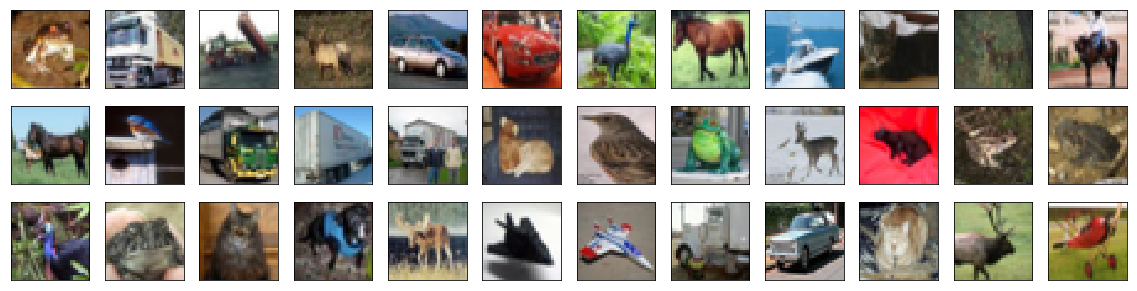

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [11]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [12]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# original
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# modified
model = Sequential()
# layer 1 and input
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
# layer 2
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
# layer 3
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
# output
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        4128      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          8256      
__________

### 6. Compile the Model 

In [14]:
# compile the model
# original
# model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# modified
# http://sifter.org/simon/journal/20150420.html
from keras.optimizers import rmsprop
model.compile(loss='categorical_crossentropy', optimizer=rmsprop(lr=0.0001, rho=0.9, epsilon=1e-6, decay=0.0), metrics=['accuracy'])

### 7. Train the Model 

In [16]:
from keras.callbacks import ModelCheckpoint   

# train the model
# original
#checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
#hist = model.fit(x_train, y_train, batch_size=32, epochs=100,validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
#          verbose=2, shuffle=True)

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=100,validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 1.02540, saving model to model.weights.best.hdf5
6s - loss: 1.1054 - acc: 0.6086 - val_loss: 1.0254 - val_acc: 0.6332
Epoch 2/100
Epoch 00001: val_loss did not improve
6s - loss: 1.1058 - acc: 0.6087 - val_loss: 1.0576 - val_acc: 0.6276
Epoch 3/100
Epoch 00002: val_loss did not improve
6s - loss: 1.0956 - acc: 0.6122 - val_loss: 1.0450 - val_acc: 0.6286
Epoch 4/100
Epoch 00003: val_loss improved from 1.02540 to 1.00698, saving model to model.weights.best.hdf5
6s - loss: 1.0936 - acc: 0.6136 - val_loss: 1.0070 - val_acc: 0.6438
Epoch 5/100
Epoch 00004: val_loss did not improve
6s - loss: 1.0911 - acc: 0.6156 - val_loss: 1.0473 - val_acc: 0.6302
Epoch 6/100
Epoch 00005: val_loss did not improve
6s - loss: 1.0791 - acc: 0.6190 - val_loss: 1.0214 - val_acc: 0.6410
Epoch 7/100
Epoch 00006: val_loss did not improve
6s - loss: 1.0798 - acc: 0.6183 - val_loss: 1.0129 - val_acc: 0.6434
Epoch 

Epoch 00060: val_loss improved from 0.86572 to 0.83832, saving model to model.weights.best.hdf5
6s - loss: 0.8987 - acc: 0.6833 - val_loss: 0.8383 - val_acc: 0.7094
Epoch 62/100
Epoch 00061: val_loss did not improve
6s - loss: 0.8994 - acc: 0.6844 - val_loss: 0.8420 - val_acc: 0.7076
Epoch 63/100
Epoch 00062: val_loss did not improve
6s - loss: 0.8950 - acc: 0.6862 - val_loss: 0.8591 - val_acc: 0.7020
Epoch 64/100
Epoch 00063: val_loss did not improve
6s - loss: 0.8942 - acc: 0.6839 - val_loss: 0.8410 - val_acc: 0.7058
Epoch 65/100
Epoch 00064: val_loss did not improve
6s - loss: 0.8890 - acc: 0.6888 - val_loss: 0.8492 - val_acc: 0.7060
Epoch 66/100
Epoch 00065: val_loss did not improve
6s - loss: 0.8887 - acc: 0.6897 - val_loss: 0.8498 - val_acc: 0.7026
Epoch 67/100
Epoch 00066: val_loss did not improve
6s - loss: 0.8853 - acc: 0.6897 - val_loss: 0.8563 - val_acc: 0.6972
Epoch 68/100
Epoch 00067: val_loss did not improve
6s - loss: 0.8836 - acc: 0.6900 - val_loss: 0.8428 - val_acc: 0.

### 8. Load the Model with the Best Validation Accuracy

In [17]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [18]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.725


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [19]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

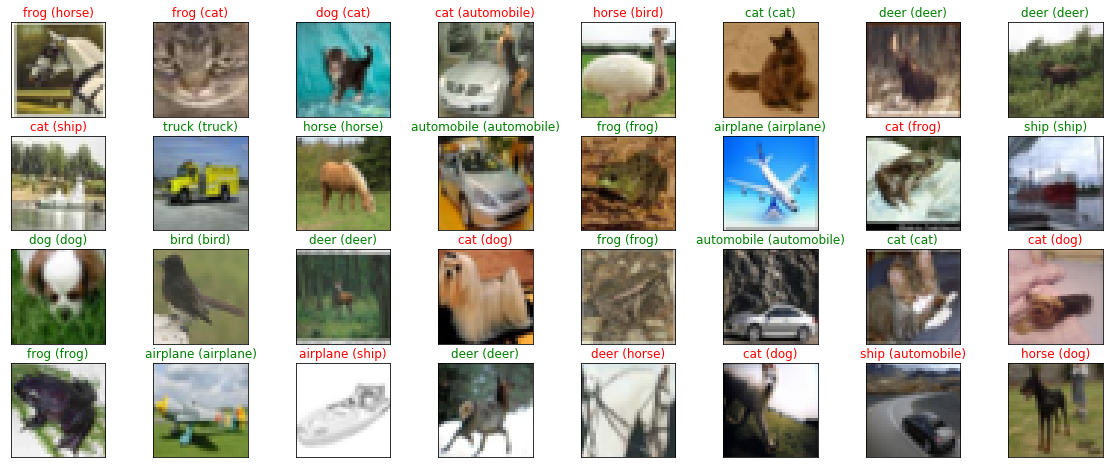

In [21]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))